# SWCON253 Machine Learning

# Data Preprocessing and Machine Learning with Scikit-Learn

In [1]:
%load_ext watermark
%watermark -v -a "Won Hee Lee" -p numpy,scipy,matplotlib,sklearn,mlxtend

Author: Won Hee Lee

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

numpy     : 1.18.5
scipy     : 1.5.0
matplotlib: 3.2.2
sklearn   : 0.23.1
mlxtend   : 0.18.0



# Machine Learning Workflow

<img src="images/ml_worflow.png" alt="drawing" width="700"/>

## Overview

In this lecture, we are closing the "Computational Foundation" section by introducing yet another Python library, pandas, which is extremely handy for data (pre)processing. The second focus of this lecture is on the [Scikit-learn](http://scikit-learn.org) machine learning library, which is widely considered as the most mature and most well-designed general machine learning library.

## Pandas - A Python Library for Working with Data Frames

- Pandas is probably the most popular and convenient data wrangling library for Python (official website: https://pandas.pydata.org) 
- Pandas stands for PANel-DAta-S.
- Similar to data frames in R.
- How is it different from NumPy arrays? 
    - Allows for heterogenous data (columns can have different data types)
    - Adds some more convenient functions on top that are handy for data processing

### Loading Tabular Datasets from Text Files

- Here, we are working with structured data, data which is organized similar to a "design matrix" (see lecture 3) -- that is, examples as rows and features as columns (in contrast: unstructured data such as text or images, etc.).
- CSV stands for "comma separated values" (also common: TSV, tab seperated values).
- The `head` command is a Linux/Unix command that shows the first 10 rows by default; the `!` denotes that Jupyter/the IPython kernel should execute it as a shell command (`!`-commands may not work if you are on Windows, but it is not really important).

In [2]:
!head data/iris.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


sepal = 꽃받침, petal = 꽃잎

<img src="images/iris_pic.png" alt="drawing" width="800"/>

- We use the `read_csv` command to load the CSV file into a pandas data frame object f of the class `DataFrame`.
- Data frames also have a `head` command; here it shows the first 5 rows.

In [3]:
import pandas as pd

df = pd.read_csv('data/iris.csv')
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
type(df)

pandas.core.frame.DataFrame

- It is always good to double check the dimensions and see if they are what we expect. 
- The `DataFrame` `shape` attribute works the same way as the NumPy array `shape` attribute (Lecture 10).

In [5]:
df.shape

(150, 6)

In [6]:
# many additional options exist 

import pandas as npw

pd.read_csv?

### Basic Data Handling

- The `apply` method offers a convenient way to manipulate pandas `DataFrame` entries along the column axis.
- We can use a regular Python or lambda function as input to the apply method.
- In this context, assume that our goal is to transform class labels from a string representation (e.g., "Iris-Setosa") to an integer representation (e.g., 0), which is a historical convention and a recommendation for compatibility with various machine learning tools.

In [7]:
df['Species'] = df['Species'].apply(lambda x: 0 if x=='Iris-setosa' else x)
df.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Digression: Lambda Functions

- If you are not familiar with "lambda functions," they are basically the same as "regular function but can be written more compactly as a one-liner.

In [8]:
def some_func(x):
    return 'Hello World ' + str(x)

some_func(123)

'Hello World 123'

In [9]:
f = lambda x: 'Hello World ' + str(x)
f(123)

'Hello World 123'

#### .map vs. .apply

- If we want to map column values from one value to another, it is often more convenient to use the `map` method instead of apply.
- The achieve the following with the `apply` method, we would have to call `apply` three times.

In [10]:
d = {'Iris-setosa': 0,
     'Iris-versicolor': 1,
     'Iris-virginica': 2}

df = pd.read_csv('data/iris.csv')
df['Species'] = df['Species'].map(d)
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


- The `tail` method is similar to `head` but shows the last five rows by default; we use it to double check that the last class label  (Iris-Virginica) was also successfully transformed

In [11]:
df.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


- It's actually not a bad idea to check if all row entries of the `Species` column got transformed correctly.

In [12]:
import numpy as np

np.unique(df['Species'])

array([0, 1, 2], dtype=int64)

#### NumPy Arrays

- Pandas' data frames are built on top of NumPy arrays.
- While many machine learning-related tools also support pandas `DataFrame` objects as inputs now, by convention, we usually use NumPy arrays most tasks.
- We can access the NumPy array that is underlying a `DataFrame` via the `values` attribute.

In [13]:
y = df['Species'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

- There are many different ways to access columns and rows in a pandas `DataFrame`, which we won't discuss here; a good reference documentation can be found at https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
- The `iloc` attribute allows for integer-based indexing and slicing, which is similar to how we use indexing on NumPy arrays (Lectures 10-11).
The following expression will select column 1, 2, 3, and 4 (sepal length, sepal width, petal length, petal width) from the `DataFrame` and then assign the underlying NumPy array to `X`.

In [14]:
X = df.iloc[:, 1:5].values

- Just as a quick check, we show the first 5 rows in the NumPy array:

In [15]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Exploratory Data Analysis

- Occasionally, we will use the MLxtend library (http://rasbt.github.io/mlxtend/) -- MLxtend stands for "machine learning extensions" and contains some convenience functions for machine learning and data science tasks.
- In particular, we will use the `scatterplotmatrix` function to display a scatter plot matrix of the dataset, which is useful to get a quick overview of the dataset (to inspect the relationship between features, look for outliers, etc.).
- You can install the MLxtend library by un-commenting and executing the next cell.

<img src="images/mlxtend.png" alt="drawing" width="400"/>

In [16]:
#conda install mlxtend --channel conda-forge

In [17]:
#pip install mlxtend

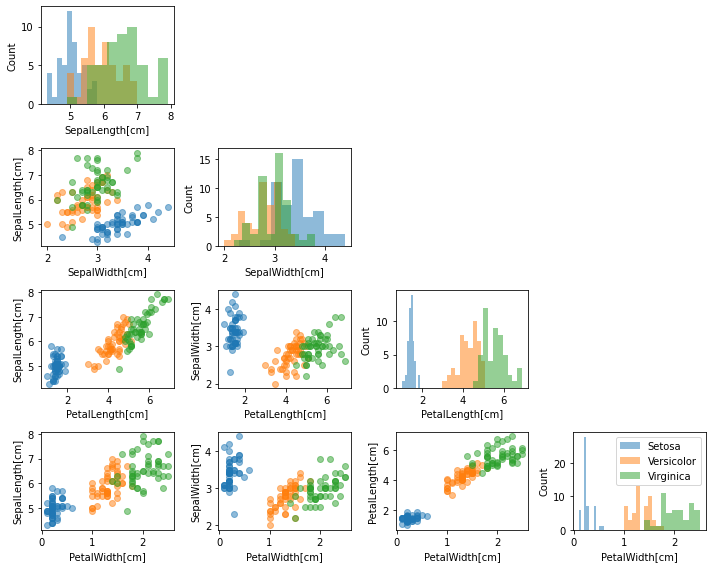

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.plotting import scatterplotmatrix


names = df.columns[1:5]

fig, axes = scatterplotmatrix(X[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==2], fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=['Setosa', 'Versicolor', 'Virginica'])
plt.savefig('images/eda.pdf')
plt.show()

## Object Oriented Programming (OOP) & Python Classes

- To get a better understanding of the scikit-learn API, we need to understand the main concepts behind Object Oriented Programming (OOP) and classes in Python
- This section illustrates the concept of "classes" in Python, which is relevant for understanding how the scikit-learn API works on a fundamental level later in this lecture.
- Note that Python is an object oriented language, and everything in Python is an object.
- Classes are "templates" for creating objects (this is called "instantiating" objects).
- An object is a collection of special "functions" (a "function" of an object or class is called "method") and attributes.
- Note that the `self` attribute is a special keyword for referring to a class or an instantiated object of a class, "itself."

In [19]:
class VehicleClass():
    
    def __init__(self, horsepower):   # __init__ is so-called "constructor"
        "This is the 'init' method"
        # this is a class attribute:
        self.horsepower = horsepower
        
    def horsepower_to_torque(self, rpm):
        "This is a regular method"
        numerator = self.horsepower * 33000
        denominator = 2* np.pi * 5000
        return numerator/denominator
    
    def tune_motor(self):
        self.horsepower *= 2
    
    def _private_method(self):
        print('this is private')
    
    def __very_private_method(self):
        print('this is very private')

In [20]:
# instantiate an object:
car1 = VehicleClass(horsepower=123)
print(car1.horsepower)

123


In [21]:
car1.horsepower_to_torque(rpm=5000)

129.20198280200063

In [22]:
car1.tune_motor()
car1.horsepower_to_torque(rpm=5000)

258.40396560400126

In [23]:
car1._private_method()

this is private


- Python has the motto "we are all adults here," which means that a user can do the same things as a developer (in contrast to other programming languages, e.g., Java).
- A preceding underscore is an indicator that a method is considered "private" -- this means, this method is meant to be used internally but not by the user directly (also, it does not show up in the "help" documentation)
- a preceding double-underscore is a "stronger" indicator for methods that are supposed to be private, and while users can access these (adhering to the "we are all adults here" motto), we have to refer to "name mangling."

In [24]:
# Excecuting the following would raise an error:
car1.__very_private_method()

AttributeError: 'VehicleClass' object has no attribute '__very_private_method'

In [25]:
# If we use "name mangling" we can access this private method:
car1._VehicleClass__very_private_method()

this is very private


- Another useful aspect of using classes is the concept of "inheritance."
- Using inheritance, we can "inherit" methods and attributes from a parent class for re-use.
- For instance, consider the `VehicleClass` as a more general class than the `CarClass` -- i.e., a car, truck, or motorbike are specific cases of a vehicle.
- Below is an example of a `CarClass` that inherits the methods from the `VehicleClass` and adds a specific `self.num_wheels=4` attribute -- if we were to create a `BikeClass`, we could set this to `self.num_wheels=2`, for example.
- All-in-all, this is a very simple demonstration of class inheritance, however, it's a concept that is very useful for writing "clean code" and structuring projects -- the scikit-learn machine learning library makes heavy use of this concept internally (we, as users, don't have to worry about it too much though, it is useful to know though in case you would like to modify or contribute to the library).

In [26]:
class CarClass(VehicleClass):

    def __init__(self, horsepower):
        super(CarClass, self).__init__(horsepower)
        self.num_wheels = 4
    
new_car = CarClass(horsepower=123)
print('Number of wheels:', new_car.num_wheels)
print('Horsepower:', new_car.horsepower)
new_car.tune_motor()
print('Horsepower:', new_car.horsepower)

Number of wheels: 4
Horsepower: 123
Horsepower: 246


## Machine Learning with Scikit-Learn

### "Main" Machine Learning Library for Python

<img src="images/ml_sklearn.png" alt="drawing" width="600"/>

## The Scikit-Learn Estimator API

- Below is an overview (main concepts) of the scikit-learn estimator API, which is used for implementing classification and regression models/algorithms.
- The `score` method simply runs `predict` on the features (`X`) internally and then computes the performance by comparing the predicted targets to the true targets `y`.
- In the case of classification models, the `score` method computes the classification accuracy (in the range [0, 1]) -- i.e., the proportion of correctly predicted labels.
In the case of regression models, the `score` method computes the coefficient of determination ($R^2$).

```python
class SupervisedEstimator(...):
    
    def __init__(self, hyperparam_1, ...):
        self.hyperparm_1
        ...
    
    def fit(self, X, y):
        ...
        self.fit_attribute_
        return self
    
    def predict(self, X):
        ...
        return y_pred
    
    def score(self, X, y):
        ...
        return score
    
    def _private_method(self):
        ...
    ...
    
```

- The graphic below summarizes the useage of the `SupervisedEstimator` API that scikit-learn uses for implementing classification and regression algorithms/models.

<img src="images/estimator-api.png" alt="drawing" width="400"/>

## Stratification

## Splitting a Dataset into Train, Validation, and Test Subsets

- If we are working with small datasets and split it randomly into subsets, it will affect the class distribution in the samples -- this is problematic since machine learning algorithms/models assume that training, validation, and test samples have been drawn from the same distributions to produce reliable models and estimates of the generalization performance.

<img src="images/iris-subsampling.png" alt="drawing" width="700"/>

- The method of ensuring that the class label proportions are the same in each subset after splitting, we use an approach that is usually referred to as "stratification (stratified splits)."
- Stratification is supported in scikit-learn's `train_test_split` method if we pass the class label array to the `stratify` parameter as shown below.

In [27]:
from sklearn.model_selection import train_test_split


X_temp, X_test, y_temp, y_test = \
        train_test_split(X, y, test_size=0.2, 
                         shuffle=True, random_state=123, stratify=y)

np.bincount(y_temp) # bincount gives the counts for 0, 1, 2 values corresponding to setosa, versicolor, virginica, respectively

array([40, 40, 40], dtype=int64)

In [50]:
# validation dataset is typically used for model tuning 
# test dataset is used for the final evaluation
X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp, y_temp, test_size=0.2,
                         shuffle=True, random_state=123, stratify=y_temp)

print('Train size', X_train.shape, 'class proportions', np.bincount(y_train))
print('Valid size', X_valid.shape, 'class proportions', np.bincount(y_valid))
print('Test size', X_test.shape, 'class proportions', np.bincount(y_test))

Train size (96, 4) class proportions [32 32 32]
Valid size (24, 4) class proportions [8 8 8]
Test size (30, 4) class proportions [10 10 10]


- For 2D datasets (which we usually only have in teaching/learning contexts), we can plot the decision regions using a convenient wrapper function in  mlxtend as shown below.

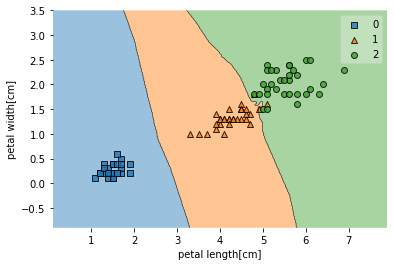

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train[:, 2:], y_train)
plot_decision_regions(X_train[:, 2:], y_train, knn_model)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.savefig('images/decisionreg.pdf')
plt.show()

## Data Scaling

- In the case of the Iris dataset, all dimensions were measured in centimeters, hence "scaling" features would not be necessary in the context of *k*NN -- unless we want to weight features differently.
- Whether or not to scale features depends on the problem at hand and requires your judgement.
- However, there are several algorithms (especially gradient-descent, etc.), which work much better (are more robust, numerically stable, and converge faster) if the data is centered and has a smaller range.
- There are many different ways for scaling features; here, we only cover to of the most common "normalization" schemes: min-max scaling and z-score standardization.

### Normalization -- Min-max scaling

- Min-max scaling squashes the features into a [0, 1] range, which can be achieved via the following equation for a single input $i$:

$$x^{[i]}_{\text{norm}} = \frac{x^{[i]} - x_{\text{min}} }{ x_{\text{max}} - x_{\text{min}} }$$

- Below is an example of how we can implement and apply min-max scaling on 6 data instances given a 1D input vector (1 feature) via NumPy.

In [52]:
x = np.arange(6).astype(float)
x

array([0., 1., 2., 3., 4., 5.])

In [53]:
x_norm = (x - x.min()) / (x.max() - x.min())
x_norm

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

### Standardization

- Z-score standardization is a useful standardization scheme if we are working with certain optimization methods (e.g., gradient descent). 
- After standardizing a feature, it will have the properties of a standard normal distribution, that is, unit variance and zero mean ($N(\mu=0, \sigma^2=1)$); however, this does not transform a feature from not following a normal distribution to a normal distributed one.
- The formula for standardizing a feature is shown below, for a single data point $x^{[i]}$.

$$x^{[i]}_{\text{std}} = \frac{x^{[i]} - \mu_x }{ \sigma_{x} }$$

In [54]:
x = np.arange(6).astype(float)
x

array([0., 1., 2., 3., 4., 5.])

In [55]:
x_std = (x - x.mean()) / x.std()
x_std

array([-1.46385011, -0.87831007, -0.29277002,  0.29277002,  0.87831007,
        1.46385011])

- A concept that is **very important** though is how we use the estimated normalization parameters (e.g., mean and standard deviation in z-score standardization).
- In particular, it is important that we re-use the parameters estimated from the **training** set to transfrom validation and test sets -- re-estimating the parameters is a common "beginner-mistake" which is why we discuss it in more detail.

In [56]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std = (X_train - mu) / sigma
X_valid_std = (X_valid - mu) / sigma
X_test_std = (X_test - mu) / sigma

- Again, if we standardize the training dataset, we need to keep the parameters (mean and standard deviation for each feature). Then, we’d use these parameters to transform our test data and any future data later on

- Let’s assume we have a simple training set consisting of 3 samples with 1 feature column (let’s call the feature column “length in cm”):

- example 1: 10 cm -> class 2
- example 2: 20 cm -> class 2
- example 3: 30 cm -> class 1

Given the data above, we estimate the following parameters from this training set:

- mean: 20
- standard deviation: 8.2

If we use these parameters to standardize the same dataset, we get the following z-score values:

- example 1: -1.21 -> class 2
- example 2: 0 -> class 2
- example 3: 1.21 -> class 1

Now, let’s say our model has learned the following classification rule: It classifies samples with a standardized length value < 0.6 as class 2 (and class 1 otherwise). 

<img src="images/std_classification_rule.png" alt="drawing" width="300"/>

So far so good. Now, let’s imagine we have 3 new unlabeled data points that you want to classify.

- example 4: 5 cm -> class ?
- example 5: 6 cm -> class ?
- example 6: 7 cm -> class ?

If we look at the non-standardized "length in cm" values in the training datast, it is intuitive to say that all of these examples (5, 6, and 7) are likely belonging to class 2  because they are smaller than anything in the training set. However, if we standardize these by re-computing the standard deviation and and mean from the **new** data, we will get similar values as before (i.e., properties of a standard normal distribution) in the training set and our classifier would (probably incorrectly) assign the “class 2” label to the samples 4 and 5.

- example 5: -1.21 -> class 2
- example 6: 0 -> class 2
- example 7: 1.21 -> class 1

However, if we use the parameters from the "training set standardization," we will get the following standardized values

- example 5: -1.83
- example 6: -1.71
- example 7: -1.59

Note that these values are more negative than the value of example1 in the original training set, which makes much more sense now!

## Scikit-Learn Transformer API

- The transformer API in scikit-learn is very similar to the estimator API; the main difference is that transformers are typically "unsupervised," meaning, they don't make use of class labels or target values.

<img src="images/transformer-api.png" alt="drawing" width="500"/>

- Typical examples of transformers in scikit-learn are the `MinMaxScaler` and the `StandardScaler`, which can be used to perform min-max scaling and z-score standardization as discussed earlier.

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)
X_test_std

array([[-0.43410382, -1.55836119,  0.01622744, -0.1401485 ],
       [-1.31809705, -0.15143949, -1.36851423, -1.19538429],
       [ 1.08131314,  0.55202136,  1.11248126,  1.70651413],
       [ 0.82874365,  0.31753441,  0.76629584,  1.04699176],
       [-1.82323603, -0.15143949, -1.4262118 , -1.32728877],
       [-1.44438179,  0.31753441, -1.4262118 , -1.32728877],
       [ 2.34416061, -0.15143949,  1.34327154,  1.44270518],
       [ 0.57617416, -1.32387424,  0.65090071,  0.38746939],
       [ 0.19731992, -0.15143949,  0.59320314,  0.78318281],
       [-1.1918123 ,  0.08304746, -1.31081666, -1.45919324],
       [-0.9392428 ,  1.72445612, -1.31081666, -1.19538429],
       [ 1.08131314, -0.15143949,  0.70859827,  0.65127834],
       [-0.05524958, -0.85490034,  0.76629584,  0.91508729],
       [ 0.32360466, -0.38592644,  0.53550557,  0.25556492],
       [ 2.34416061,  1.72445612,  1.68945696,  1.31080071],
       [ 1.20759789, -0.62041339,  0.59320314,  0.25556492],
       [-1.82323603,  0.

## Categorical Data

- When we preprocess a dataset as input to a machine learning algorithm, we have to be careful how we treat categorical variables.
- There are two broad categories of categorical variables: nominal (no order implied) and ordinal (order implied).

In [58]:
df = pd.read_csv('data/categoricaldata.csv')
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XXL,15.3,class1


- In the example above, 'size' would be an example of an ordinal variable; i.e., if the letters refer to T-shirt sizes, it would make sense to come up with an ordering like M < L < XXL.
- Hence, we can assign increasing values to a ordinal values; however, the range and difference between categories depends on our domain knowledge and judgement.
- To convert ordinal variables into a proper representation for numerical computations via machine learning algorithms, we can use the now familiar `map` method in Pandas, as shown below.

In [59]:
mapping_dict = {'M': 2,
                'L': 3,
                'XXL': 5}

df['size'] = df['size'].map(mapping_dict)
df

,color,size,price,classlabel
0,green,2,10.1,class1
1,red,3,13.5,class2
2,blue,5,15.3,class1


- Machine learning algorithms do not assume an ordering in the case of class labels.
- Here, we can use the `LabelEncoder` from scikit-learn to convert class labels to integers as an alternative to using the `map` method

In [60]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['classlabel'] = le.fit_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,2,10.1,0
1,red,3,13.5,1
2,blue,5,15.3,0


- Representing nominal variables properly is a bit more tricky.
- Since machine learning algorithms usually assume an order if a variable takes on integer values, we need to apply a "trick" here such that the algorithm would not make this assumption.
- this "trick" is also called "one-hot" encoding -- we binarize a nominal variable, as shown below for the color variable (again, we do this because some ordering like orange < red < blue would not make sense in many applications).

In [61]:
pd.get_dummies(df)

,size,price,classlabel,color_blue,color_green,color_red
0,2,10.1,0,0,1,0
1,3,13.5,1,0,0,1
2,5,15.3,0,1,0,0


- Note that executing the code above produced 3 new variables for "color," each of which takes on binary values.
- However, there is some redundancy now (e.g., if we know the values for `color_green` and `color_red`, we automatically know the value for `color_blue`).
- While collinearity may cause problems (i.e., the matrix inverse doesn't exist in e.g., the context of the closed-form of linear regression), again, in machine learning we typically would not care about it too much, because most algorithms can deal with collinearity (e.g., adding constraints like regularization penalties to regression models, which we learn via gradient-based optimization).
- However, removing collinearity if possible is never a bad idea, and we can do this conveniently by dropping e.g., one of the columns of the one-hot encoded variable.

In [62]:
pd.get_dummies(df, drop_first=True)

,size,price,classlabel,color_green,color_red
0,2,10.1,0,1,0
1,3,13.5,1,0,1
2,5,15.3,0,0,0


## Missing Data

- There are many different ways for dealing with missing data.
- The simplest approaches are removing entire columns or rows.
- Another simple approach is to impute missing values via the feature means, medians, mode, etc.
- There is no rule or best practice, and the choice of the approprite missing data imputation method depends on your judgement and domain knowledge.
- Below are some examples for dealing with missing data.

In [63]:
df = pd.read_csv('data/missingdata.csv')
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [64]:
# missing values per column:

df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [65]:
# drop rows with missing values:

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [66]:
# drop columns with missing values:

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [67]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [68]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = df.values
X = imputer.fit_transform(df.values)
X

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## Feature Transformation, Extraction, and Selection

We have already covered very simple cases of feature transformation, i.e., normalization, that is, min-max scaling and standardization. There are many other cases, but an extensive coverage of feature preprocessing is beyond the scope of a machine learning class. However, we will will look at some popular feature selection (sequential feature selection) and feature extraction (e.g., principal component analysis) techniques later in this course.

## Scikit-Learn Pipelines

- Scikit-learn pipelines are an extremely convenient and powerful concept -- one of the things that sets scikit-learn apart from other machine learning libraries.
- Pipelines basically let us define a series of perprocessing steps together with fitting an estimator.
- Pipelines will automatically take care of pitfalls like estimating feature scaling parameters from the training set and applying those to scale new data (which we discussed earlier in the context of z-score standardization).
- Below is an visualization of how pipelines work.

<img src="images/sklearn-pipeline.png" alt="drawing" width="500"/>

- Below is an example pipeline that combines the feature scaling step with the *k*NN classifier.

In [69]:
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=3))

In [70]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [71]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 2, 1, 1, 1, 1], dtype=int64)

- As you can see above, the Pipeline itself follows the scikit-learn estimator API.

(Also see the [FunctionTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) in scikit-learn, which allows creating a transformer class from an arbitrary callable or function.)

## Further Reading

- Python Machine Learning 2nd ed.: Chapters 4.1 to 4.4 (page 136-154)
- Python Machine Learning 2nd ed.: Chapter 6.1 (page 218-222)

## Further Resources

- Scikit-learn documentation: http://scikit-learn.org/stable/documentation.html